<a href="https://colab.research.google.com/github/daisycloudtai/zero-to-mastery-ml/blob/master/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy as np
from datetime import datetime, date

# 1. **Timeseries**

I based my project on a CSV file, created using SourceSTak API.
In my resquest I filtered for tech jobs, from all over the world. 
Ms CSV file has 50_000 rows.

In [ ]:
jobs = pd.read_csv('/content/SourceStack.csv')

FileNotFoundError: ignored

In order to create a time series I changed the datetime to only date.

In [ ]:
jobs['job_published_at'] = pd.to_datetime(jobs['job_published_at']).dt.date
jobs['last_indexed'] = pd.to_datetime(jobs['last_indexed']).dt.date

In [ ]:
jobs.head()

,job_name,job_location,hours,remote,company_name,education,tags_matched,tag_categories,categories,seniority,comp_est,language,city,country,job_published_at,last_indexed
0,Backend Developer,"Praha, Czech Republic",NaN,NaN,IBM,NaN,"[Docker, GraphQL, NoSQL, IBM, MongoDB, TypeScr...","[Container Orchestration, Query/Data Flow, App...",[Software],NaN,NaN,pl,Praha,Czech Republic,2023-03-13,2023-06-05
1,Manufacturing Engineer,NaN,Full-Time,False,NaN,NaN,[Sigma],"[Tools, Serverless]",[Manufacturing],NaN,NaN,en,Sterling Heights,United States,2021-10-09,2023-05-24
2,"Design Engineer, Motorized Products","520 S Byrkit St Mishawaka, Indiana, 46544 Unit...",Full-Time,NaN,ABI Attachments,Bachelors,[],[],[Design],Senior IC,NaN,en,Mishawaka,United States,2023-04-28,2023-05-19
3,Cybersecurity Engineer,NaN,Full-Time,False,NaN,Bachelors,"[AWS, Qualys, Splunk]","[Compute, Logging & Monitoring, PaaS, Infrastr...","[Cybersecurity, Security]",NaN,NaN,en,Herndon,United States,2023-04-03,2023-05-28
4,Your Career so choose wisely with Adeeba Group...,"Kolkata, India",Full-Time,False,Adeeba e Services,NaN,"[Objective-C, Subversion, Swift, iOS, Git]","[Cloud Native Storage, Programming Languages, ...",[Software],NaN,NaN,en,Kolkata,India,2017-01-17,2023-05-30


In [ ]:
jobs = jobs.dropna(subset=['job_published_at']).reset_index(drop=True)
jobs['job_published_at'].sort_values()


31627    1900-11-18
43416    2009-09-24
20283    2009-09-24
40069    2010-09-21
9821     2011-07-05
            ...    
8724     2023-11-05
17001    2023-11-05
4959     2023-11-05
13709    2023-12-04
39575    2023-12-05
Name: job_published_at, Length: 44006, dtype: object

I filtered out date outliers, and created 2 ranges, job offers from
-**last 5 years**
-**last one an half year**

In [ ]:
import datetime
long_period = datetime.date(2018, 1, 1)
short_period = datetime.date(2022, 1, 1)
today = datetime.date.today()
last5y_jobs = (jobs['job_published_at']>long_period) & (jobs['job_published_at']<=today)
last1y_jobs = (jobs['job_published_at']>short_period) & (jobs['job_published_at']<=today)


This plot shows number of jobs published at a certain date from last 5 years. The number of job openings remained more or less constant. WIth one sudden peak in the middle of 2021. Since 2022 a noticeable growth in the number of jobs published per day. It reaches it's maximum in April 2023. In the recent weeks a drop in number of jobs openings can be noticed. 

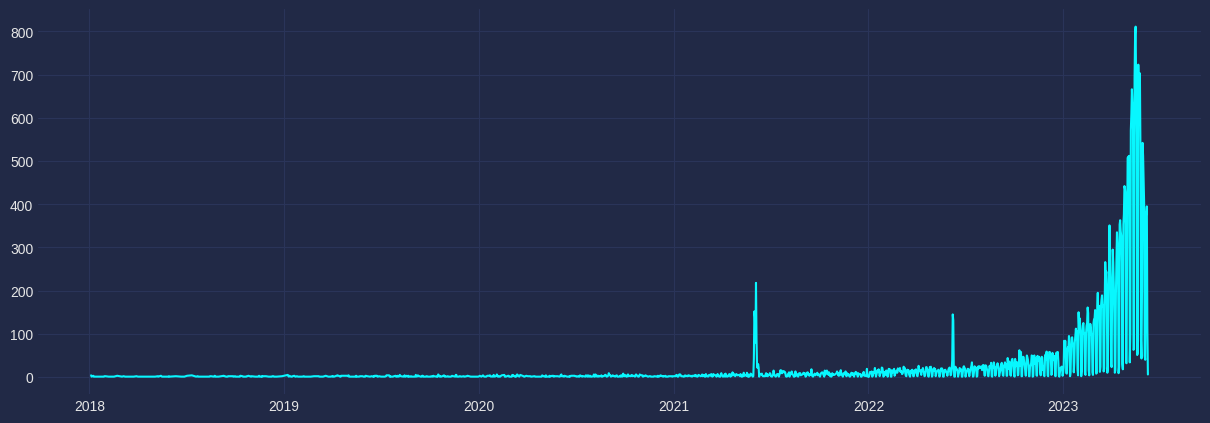

In [ ]:
ts_jobs5 = jobs[last5y_jobs]
jobs_series5= ts_jobs5['job_published_at'].value_counts()
jobs_series5.plot(kind='line', figsize=(15,5))

image_path = '/content/line_alljobs_5years.png'
plt.savefig(image_path)


This plot shows number of jobs published at a certain date from last year and a half. We can clearly see the growth in the number of jobs published per day. It reaches it's maximum in April 2023. In the recent weeks a drop in number of jobs openings can be noticed.

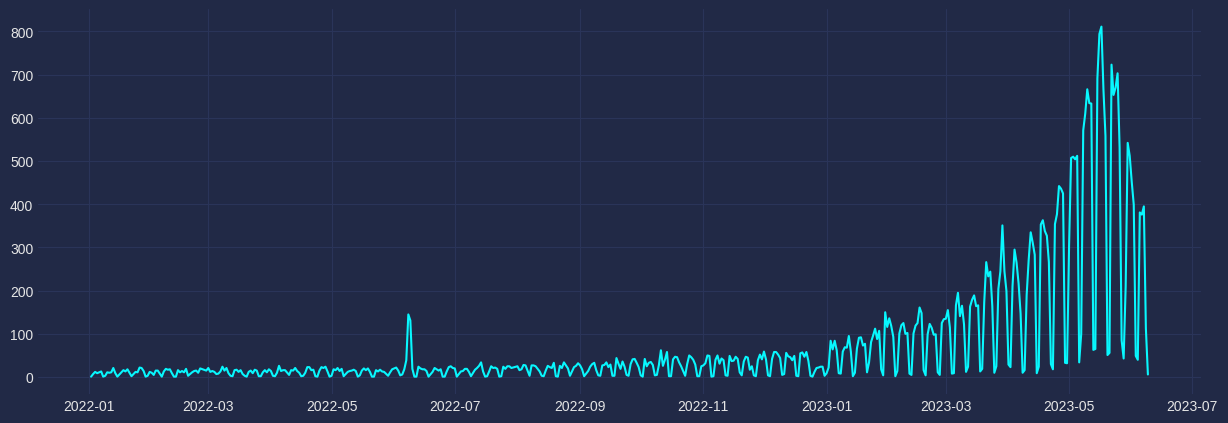

In [ ]:
ts_jobs1 = jobs[last1y_jobs]
jobs_series1= ts_jobs1['job_published_at'].value_counts()
jobs_series1.plot(kind= 'line', figsize = (15, 5))
image_path = '/content/line_alljobs1year.png'
plt.savefig(image_path)



JUNIOR ROLES VS SENIOR ROLES

In [ ]:
jobs['seniority'].value_counts()

Senior IC            8094
IC                   2950
Manager              2891
Unclear Seniority    1927
Staff IC             1622
Junior IC             720
Intern                690
Contract              578
Director              334
Chief                 204
Exec                  187
Senior Manager        134
Senior Exec             2
Founder                 2
Name: seniority, dtype: int64

In [ ]:
junior_pos = (jobs['seniority']=='Junior IC') | (jobs['seniority']=='Intern IC')
mid_pos = (jobs['seniority']=='IC') 
senior_pos = (jobs['seniority']=='Senior IC')

<ipython-input-301-773ea506f101>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  junior_series5 = ts_jobs5[junior_pos]
<ipython-input-301-773ea506f101>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid_series5 = ts_jobs5[mid_pos]
<ipython-input-301-773ea506f101>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sen_series5 = ts_jobs5[senior_pos]


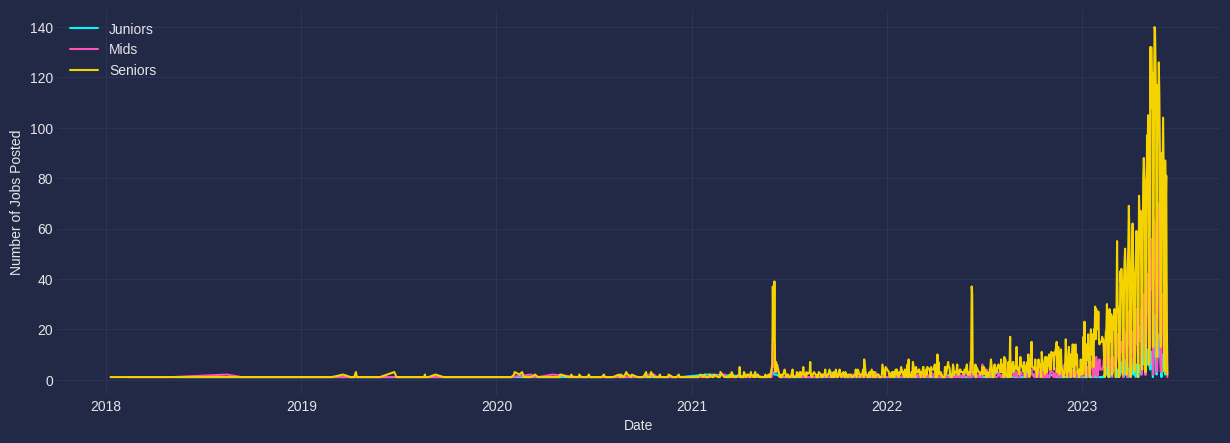

In [ ]:
junior_series5 = ts_jobs5[junior_pos]
mid_series5 = ts_jobs5[mid_pos]
sen_series5 = ts_jobs5[senior_pos]

junior_jobs5= junior_series5['job_published_at'].value_counts()
mid_jobs5= mid_series5['job_published_at'].value_counts()
senior_jobs5 = sen_series5['job_published_at'].value_counts()

junior_jobs5.plot(kind= 'line', figsize = (15, 5), label= 'Juniors')
mid_jobs5.plot(kind= 'line', figsize = (15, 5),  label= 'Mids')
senior_jobs5.plot(kind= 'line', figsize = (15, 5),  label= 'Seniors')
plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('Number of Jobs Posted')
#mplcyberpunk.make_lines_glow()
image_path = '/content/junior_mid_senior5years.png'
plt.savefig(image_path)


In this plot I compared the number of job published according to the seniority. Senior-level jobs seem to be posted the most, and Junior and Intern positions the least. The mid as the name says stays nicely in the mid. Looking at the trend there is a constant growth in the number of jobs positions in all three groups untill April 2023. Chat-GPT made a lot of people anxious about the future of their carriers in tech. In this plot we can clearly see that there is no drop in number of jobs posted, also no decrease when it comes to junior& intern positions after November 2022 (introduction of Chat-GPT to the public). We see a clear dip after April 2023, so maybe CHat-Gpt is indeed influencing the number of jobs being posted. 

In [ ]:
junior_series1 = ts_jobs1[junior_pos]
mid_series1 = ts_jobs1[mid_pos]
senior_series1 = ts_jobs1[senior_pos]

junior_jobs1= junior_series1['job_published_at'].value_counts()
mid_jobs1= mid_series1['job_published_at'].value_counts()
senior_jobs1 = senior_series1['job_published_at'].value_counts()

junior_jobs1.plot(kind= 'line', figsize = (15, 5), label = 'Juniors')
mid_jobs1.plot(kind= 'line', figsize = (15, 5), label = 'Mids')
senior_jobs1.plot(kind= 'line', figsize = (15, 5), label = 'Seniors')

plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('Number of Jobs Posted')
mplcyberpunk.make_lines_glow()
image_path = '/content/junior_mid_senior1year.png'
plt.savefig(image_path)






NameError: ignored

In [ ]:
junior_series1.describe()

,job_name,job_location,hours,remote,company_name,education,tags_matched,tag_categories,categories,seniority,comp_est,language,city,country,job_published_at,last_indexed
count,663,590,549,128,635,246,662,662,663,663,176,663,570,620,663,663
unique,519,441,11,2,407,5,349,366,191,1,82,19,362,61,172,25
top,"JUNIOR DATA SCIENTIST - Dubai, UAE",Remote,Full-Time,False,ProAutomated,Bachelors,[],[],[],Junior IC,67500.0,en,Albany,United States,2023-04-24,2023-06-08
freq,21,28,500,65,36,215,196,230,184,663,32,521,11,334,31,70


JUNIOR ROLES DATA

In [ ]:

all_IC_5years = ts_jobs5[junior_pos| mid_pos |senior_pos]
all_IC_5years['seniority'].value_counts()


<ipython-input-304-b58b759369e0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_IC_5years = ts_jobs5[junior_pos| mid_pos |senior_pos]


Senior IC    7849
IC           2803
Junior IC     699
Name: seniority, dtype: int64

In [ ]:
ts_jobs1['seniority'].value_counts()

Senior IC            7162
IC                   2609
Manager              2520
Unclear Seniority    1795
Staff IC             1520
Junior IC             663
Intern                576
Contract              520
Director              307
Chief                 190
Exec                  171
Senior Manager        127
Senior Exec             2
Founder                 1
Name: seniority, dtype: int64

In [ ]:


all_IC_1year = ts_jobs1[junior_pos| mid_pos |senior_pos]
all_IC_1year['seniority'].value_counts()

<ipython-input-306-a0793eda4243>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_IC_1year = ts_jobs1[junior_pos| mid_pos |senior_pos]


Senior IC    7162
IC           2609
Junior IC     663
Name: seniority, dtype: int64

I also checked how many jobs have been posted in the last 5 years per seniority.
We can see that Senior are highly in demand, followed by managers and Mid- tech roles.

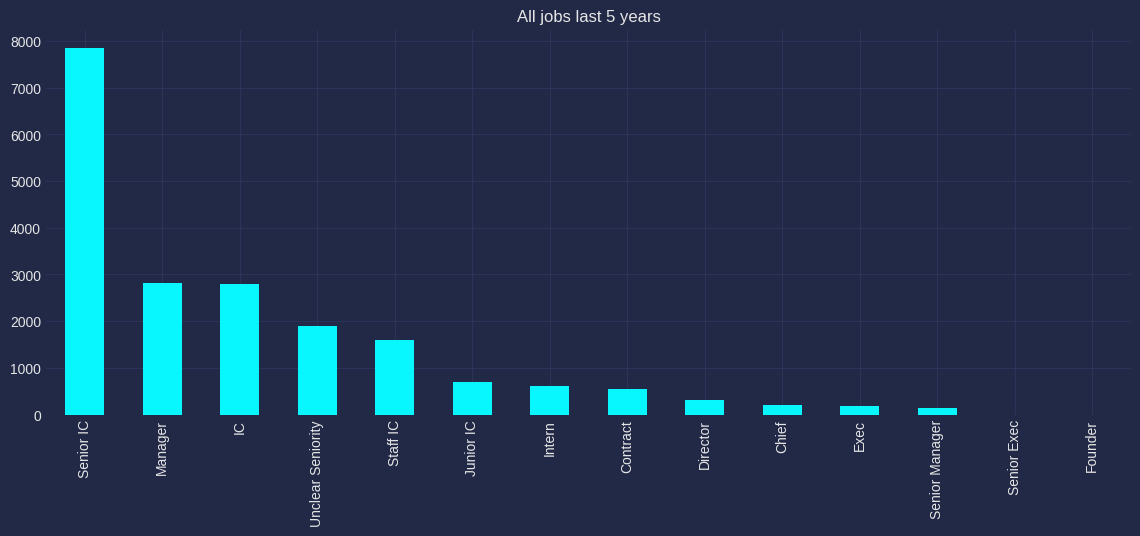

<Figure size 640x480 with 0 Axes>

In [ ]:
a= ts_jobs5['seniority'].sort_values().value_counts().plot(kind='bar', figsize=(14,5))
a.set_title('All jobs last 5 years')
plt.show()

image_path = '/content/number_jobs_seniority5years.png'
plt.savefig(image_path)

I checked the same for the period of time starting at January the 1st 2022, and the trend is exactly the same.

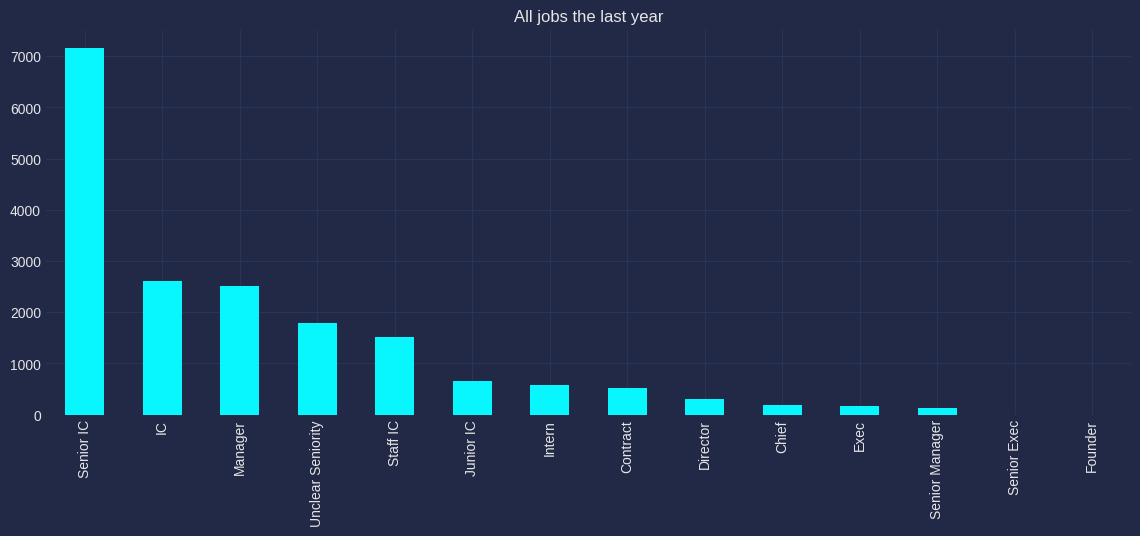

<Figure size 640x480 with 0 Axes>

In [ ]:

b = ts_jobs1['seniority'].sort_values().value_counts().plot(kind='bar', figsize=(14,5))
b.set_title('All jobs the last year')

plt.show()
image_path = '/content/number_jobs_seniority1year.png'
plt.savefig(image_path)

Number of Junior and Intern jobs posted 5 years ago is the same as the last 1,5 year.
So we can clearly see that the number is small but constant.

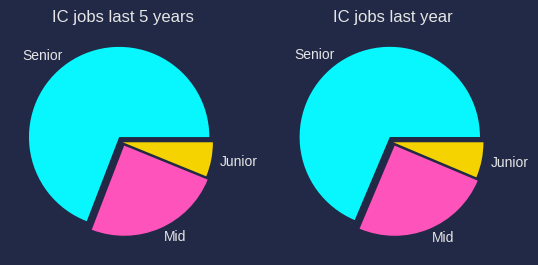

<Figure size 640x480 with 0 Axes>

In [ ]:


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(all_IC_5years['seniority'].value_counts(),explode=(0.07,0.04,0), labels=['Senior', 'Mid', 'Junior'])
ax1.set_title('IC jobs last 5 years')
ax2.pie(all_IC_1year['seniority'].value_counts(), explode=(0.07,0.04,0), labels=['Senior', 'Mid', 'Junior'])
ax2.set_title('IC jobs last year')

plt.show()
image_path = '/content/number_ICjobs_5vs1.png'
plt.savefig(image_path)


COMP_EST FOR JUNIOR ROLES COMPARED TO MID AND SENIOR

In [ ]:

jobs['country'].value_counts()

United States     20899
India              3746
United Kingdom     1788
Germany            1665
Canada             1229
                  ...  
Senegal               1
Tajikistan            1
Cayman Islands        1
Mozambique            1
Angola                1
Name: country, Length: 153, dtype: int64

In [ ]:
junior_jobs = jobs[junior_pos]
junior_jobs['country'].value_counts()

United States     366
Germany            48
India              25
Canada             21
United Kingdom     19
                 ... 
Croatia             1
Uganda              1
Cyprus              1
Hong Kong           1
Finland             1
Name: country, Length: 61, dtype: int64

In [ ]:
percentage_junior_percountry=junior_jobs['country'].value_counts()/jobs['country'].value_counts()*100

In [ ]:
percentage_junior_percountry.sort_values(ascending=False)

Azerbaijan    50.000000
Kosovo        33.333333
Uganda        20.000000
Croatia       11.111111
Slovakia      10.000000
                ...    
Venezuela           NaN
Vietnam             NaN
Wales               NaN
Zambia              NaN
Zimbabwe            NaN
Name: country, Length: 153, dtype: float64

In [ ]:
percentage_junior_percountry.dropna()
percentage_junior_percountry= percentage_junior_percountry[percentage_junior_percountry.values>1]
percentage_junior_percountry.index


Index(['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Hong Kong', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Kenya', 'Kosovo', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Turkey', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype='object')

In the below plot I checked what percentage of Junior and Intern positions each country have.  Azerbajijan has 50% of job posted for junior roles, Kosovo more than 30% and in Uganda around 20% of jobs posted is offered in this seniority level.
In most countries junior roles make up for 3%-10% percent of jobs posted.

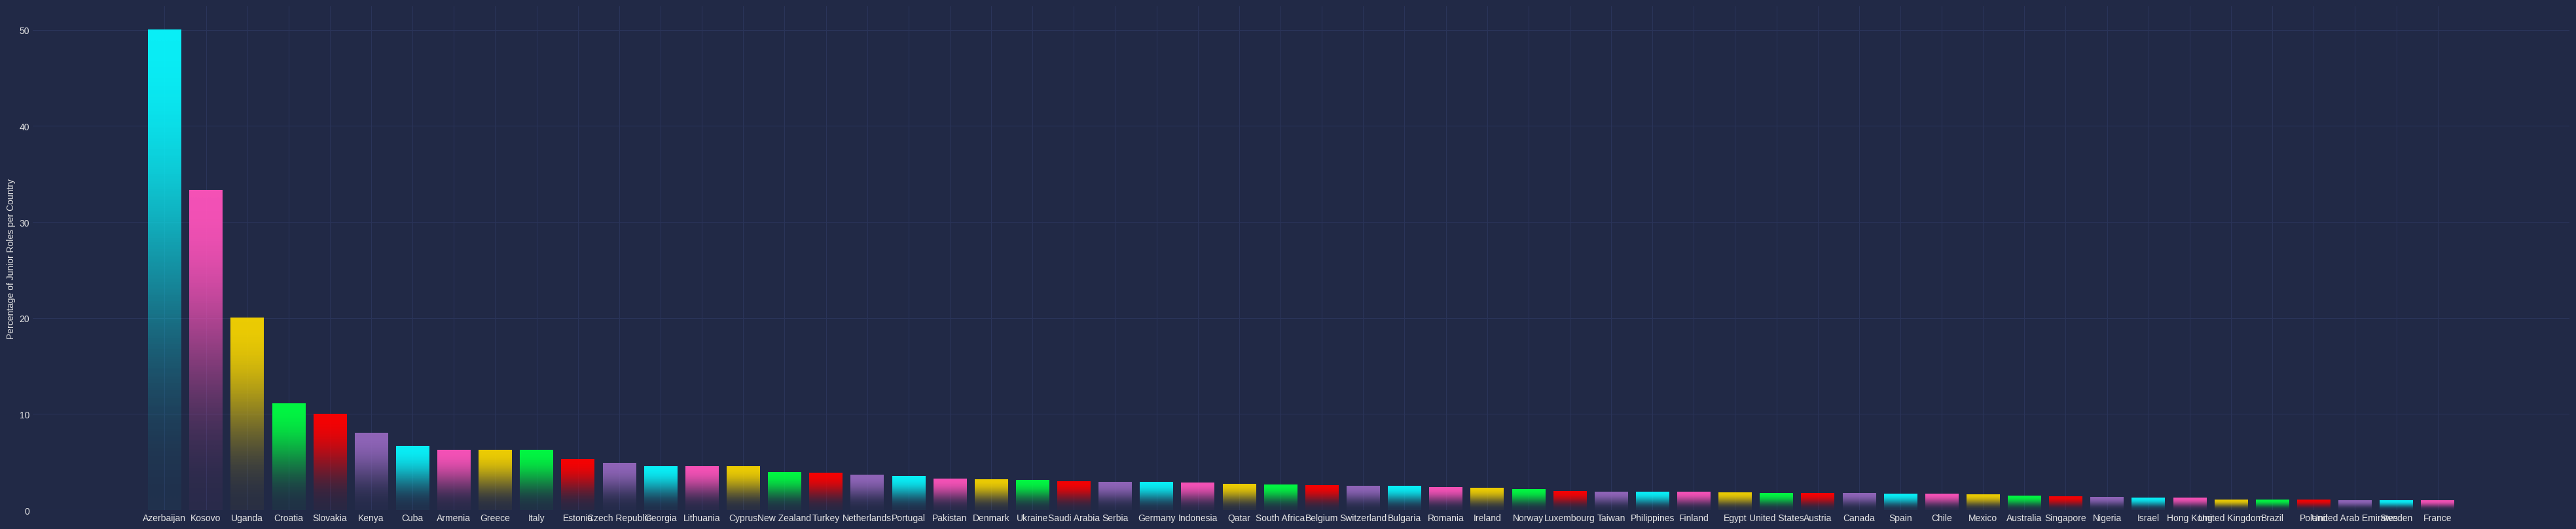

In [ ]:
percentage_junior_percountry = percentage_junior_percountry.sort_values(ascending=False)
plt.style.use('cyberpunk')
categories = percentage_junior_percountry.index
values = percentage_junior_percountry
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0", "C1", "C2", "C3", "C4", "C5","C0"]
plt.figure(figsize=(50,10)) 
bars = plt.bar(categories, values, color=colors, zorder=2)
plt.ylabel('Percentage of Junior Roles per Country')
mplcyberpunk.add_bar_gradient(bars=bars)
image_path = '/content/percentage_junior_percountry.png'
plt.savefig(image_path)


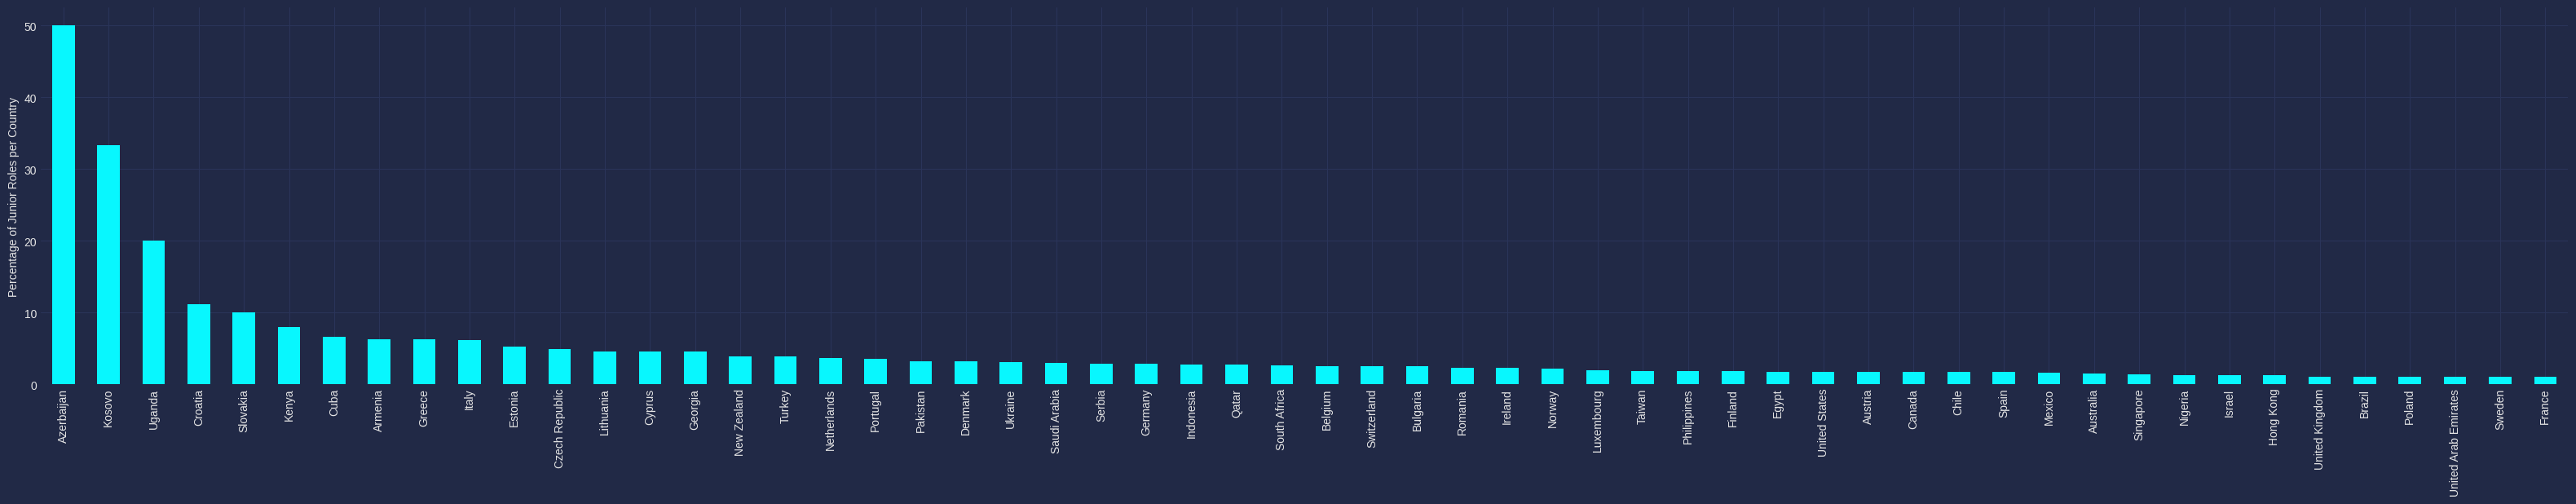

In [ ]:

percentage_junior_percountry.sort_values(ascending=False).plot(kind='bar', figsize=(40,6))
plt.ylabel('Percentage of Junior Roles per Country')
image_path = '/content/percentage_junior_percountry_butnocolors.png'
plt.savefig(image_path)

In [ ]:
ts_jobs1['comp_est'].value_counts()

None         289
1.00         113
6.00          80
17.00         67
15.00         58
            ... 
88.00          1
124750.00      1
32.13          1
120250.00      1
99250.00       1
Name: comp_est, Length: 2015, dtype: int64

In [ ]:
salary = jobs['comp_est'].value_counts()
jobs['comp_est'] = pd.to_numeric(jobs['comp_est'], errors='coerce')
salary_cleaned = (jobs['comp_est']>1000) & (jobs['comp_est']<500000)
jobs_withsalary = jobs[salary_cleaned]
jobs_withsalary['comp_est'].value_counts()

100000.000    72
110000.000    68
150000.000    67
60000.000     66
120000.000    63
              ..
150067.885     1
121450.000     1
218300.000     1
112050.000     1
99250.000      1
Name: comp_est, Length: 1542, dtype: int64

This histogram shows the distribution of estimated compensation for all seniorities.
Most jobs posted that were specifing the estimation would let you earn between 100_000 to 150_000.

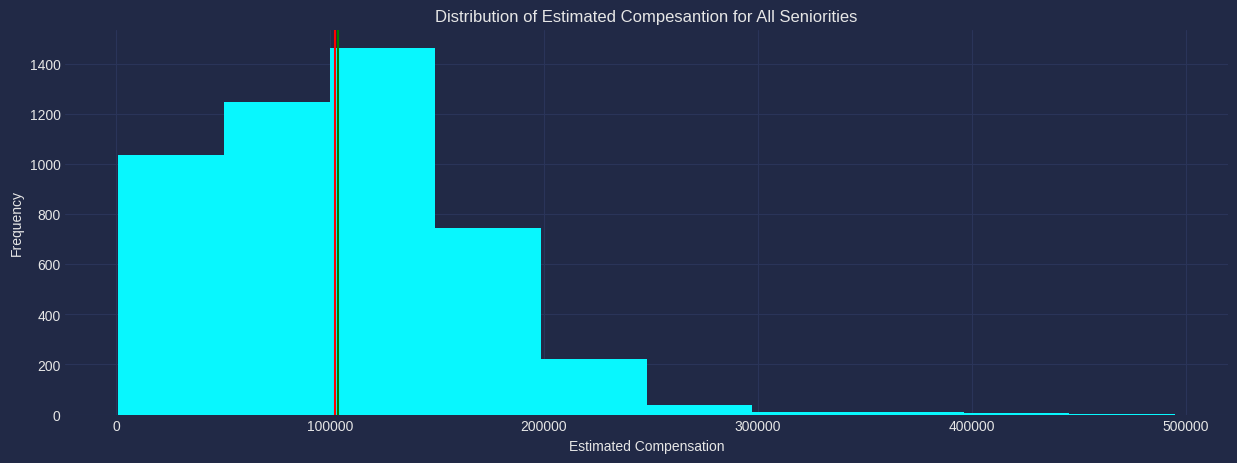

In [ ]:

ax =jobs_withsalary['comp_est'].plot(kind="hist", figsize=(15,5))
ax.axvline(jobs_withsalary['comp_est'].mean(), color='green')
ax.axvline(jobs_withsalary['comp_est'].median(), color= 'red')
plt.xlabel('Estimated Compensation')
plt.title('Distribution of Estimated Compesantion for All Seniorities')
image_path = 'Distribution of Estimated Compesantion for All Seniorities.png'
plt.savefig(image_path)


In [ ]:
junior_salary = jobs_withsalary[junior_pos]
junior_salary['comp_est'].value_counts()

<ipython-input-320-39bbbce5d0cf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  junior_salary = jobs_withsalary[junior_pos]


67500.000     33
60000.000     30
35000.000      7
70000.000      4
86000.000      4
40000.000      4
1200.000       4
36000.000      3
77500.000      3
80000.000      3
75950.000      3
105000.000     2
75000.000      2
63000.000      2
50000.000      2
90000.000      2
3000.000       2
106000.000     1
91281.875      1
73000.000      1
125000.000     1
42500.000      1
80060.000      1
42000.000      1
85350.000      1
48000.000      1
85000.000      1
127500.000     1
44000.000      1
26400.000      1
8500.000       1
117500.000     1
98500.000      1
45000.000      1
34000.000      1
53300.000      1
109000.000     1
36890.000      1
50850.000      1
89156.000      1
30000.000      1
68500.000      1
46000.000      1
82500.000      1
115000.000     1
61500.000      1
85950.000      1
80750.000      1
10000.000      1
100000.000     1
93500.000      1
93650.000      1
56435.500      1
Name: comp_est, dtype: int64

This histogram shows the distribution of estimated compensation for Junior roles and Interns.
Most jobs posted that were specifing the estimation at this seniority would allow you to earn around 70_000.

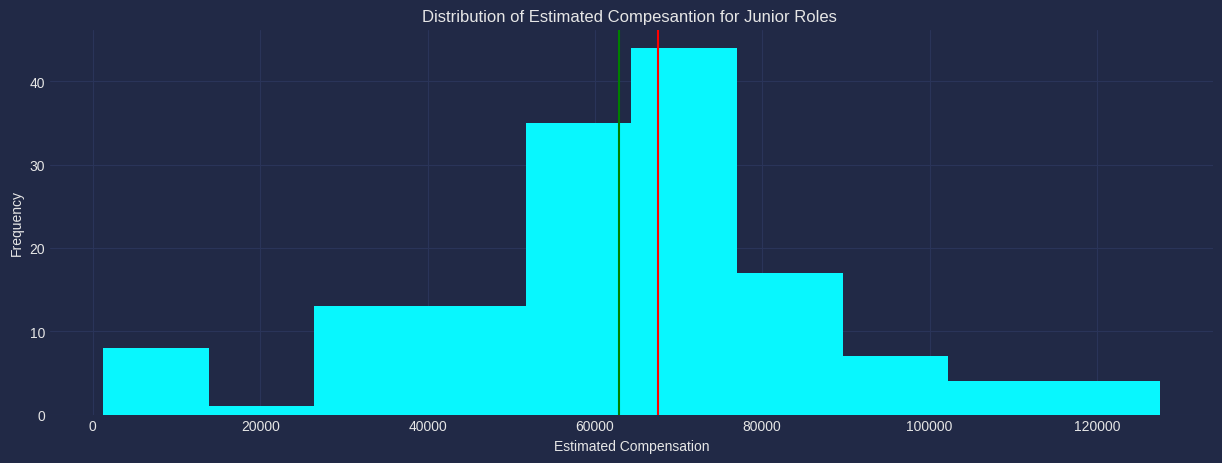

In [ ]:

ax =junior_salary['comp_est'].plot(kind="hist", figsize=(15,5))

ax.axvline(junior_salary['comp_est'].mean(), color='green')
ax.axvline(junior_salary['comp_est'].median(), color= 'red')
plt.xlabel('Estimated Compensation')
plt.title('Distribution of Estimated Compesantion for Junior Roles ')
image_path = 'Distribution of Estimated Compesantion for Junior Roles.png'
plt.savefig(image_path)



The stacked histograms of estimated compensation for all seniorities and junior roles.

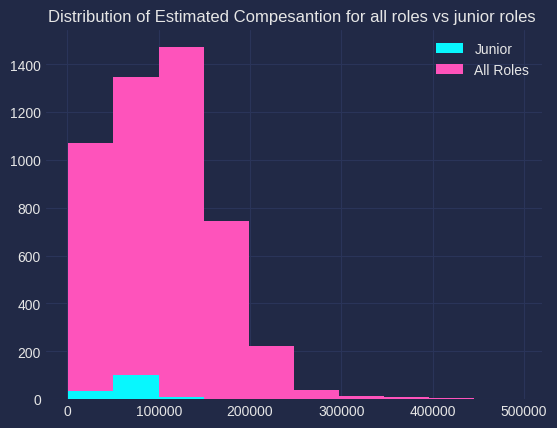

In [ ]:
plt.title('Distribution of Estimated Compesantion for all roles vs junior roles ')

plt.hist([junior_salary['comp_est'], jobs_withsalary['comp_est']], 
         stacked=True)

plt.legend(['Junior', 'All Roles'])
image_path = 'Distribution of Estimated Compesantion Stacked.png'
plt.savefig(image_path)


NO HIGHER EDUCATION REQUIRED

In [ ]:
jobs['education'].value_counts(dropna=False)
jobs_education = jobs.dropna(subset=['education']).reset_index(drop=True)

In [ ]:
jobs_education['education'].value_counts()

Bachelors                   13434
High School                  1554
Masters                       706
Doctorate                     524
Some High School              361
Vocational                     73
Associates                     58
No Education Requirement        8
Some College                    5
Certification                   1
Name: education, dtype: int64

This pie chart shows that the jobs not requiring higher education, are posted for all seniorities. Most of the jobs don't specify the seniority, but there are also Manager roles or Senior roles, where there is no such requirement.

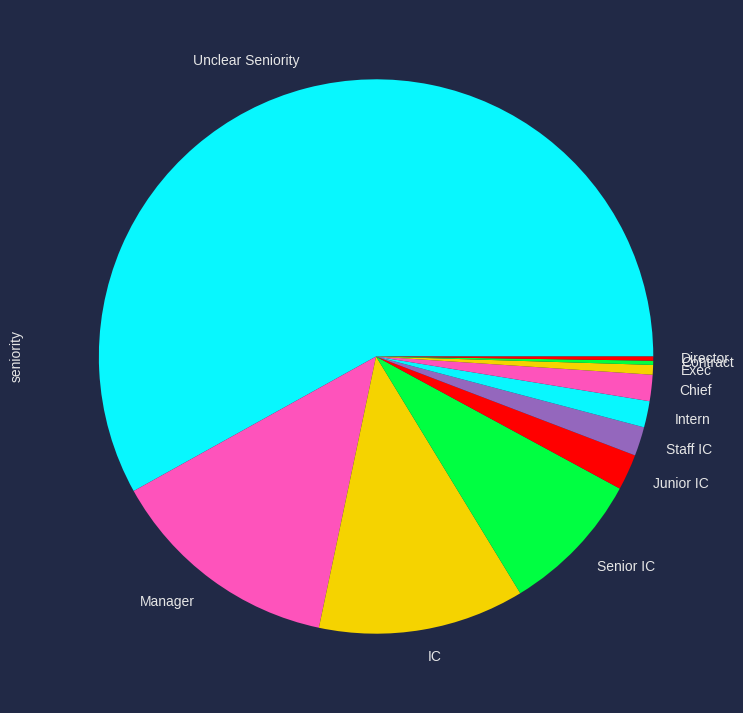

In [ ]:
no_higher_edu = (jobs_education['education']=='High School') | (jobs_education['education']=='Some High School') | (jobs_education['education']=='No Education Requirement')
no_high_jobs= jobs_education[no_higher_edu]

no_high_jobs['seniority'].value_counts().plot(kind="pie", figsize=(9,9))
image_path = 'Number of Jobs with No Higher Education Requirement per Seniority.png'
plt.savefig(image_path)

If you happen to have a Bachelors or Master degree or a Doctorate, there are more jobs for you in Senior job roles.

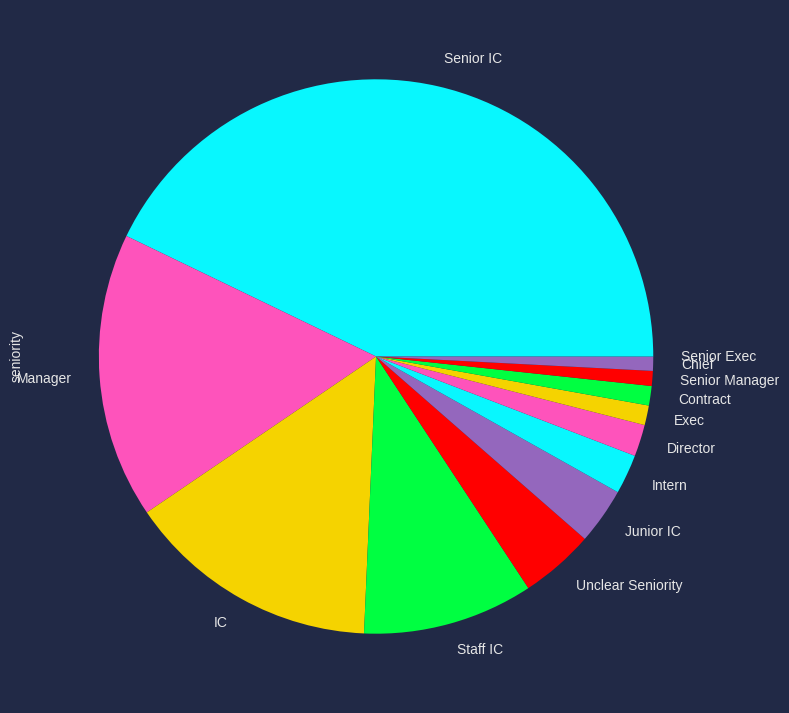

In [ ]:
high_edu = (jobs_education['education']=='Bachelors') | (jobs_education['education']=='Masters') | (jobs_education['education']=='Doctorate')
jobs_high = jobs_education[high_edu]
jobs_high['seniority'].value_counts().plot(kind="pie", figsize=(9,9))
image_path = 'Number of Jobs with Higher Education Requirement per Seniority.png'
plt.savefig(image_path)

In [ ]:
no_high_jobs['seniority'].value_counts()


Unclear Seniority    720
Manager              169
IC                   149
Senior IC            104
Junior IC             26
Staff IC              21
Intern                19
Chief                 19
Exec                   7
Contract               3
Director               3
Name: seniority, dtype: int64